In [90]:
# to work with dataframes
import pandas as pd
import numpy as np

# to split data into train and test
from sklearn.model_selection import train_test_split

# to build logistic regression model
from sklearn.linear_model import LogisticRegression

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To build a Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# Credit Card Users Churn Prediction:
Problem: 

Some of Thera Bank Customers’ are leaving credit cards services. This would lead bank to loss.  Goal is to  t analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.

# Objective

1. What are the different factors which affect the target variable, Attrition_Flag. if the account is closed then "Attrited Customer" else "Existing Customer"? 

2. What business recommendations can we give based on the analysis?
3. How can we improve model performance using hyperparameter tuning and prevent data leakage using pipelines while building a model to predict the response of a customer?


Data Dictionary:

Data Dictionary:

CLIENTNUM: Client number. Unique identifier for the customer holding the account
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
Customer_Age: Age in Years
Gender: Gender of the account holder
Dependent_count: Number of dependents
Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
Marital_Status: Marital Status of the account holder
Income_Category: Annual Income Category of the account holder
Card_Category: Type of Card
Months_on_book: Period of relationship with the bank
Total_Relationship_Count: Total no. of products held by the customer
Months_Inactive_12_mon: No. of months inactive in the last 12 months
Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
Credit_Limit: Credit Limit on the Credit Card
Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
Total_Trans_Amt: Total Transaction Amount (Last 12 months)
Total_Trans_Ct: Total Transaction Count (Last 12 months)
Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


# **Load Data**

In [91]:
# from google.colab import drive
# drive.mount('/content/drive')

In [92]:
df=pd.read_csv("/content/drive/MyDrive/Banck_churn_Project/BankChurners.csv")

# **Data Properties**

In [93]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [94]:
data = df.copy()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [96]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [97]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [98]:
data.describe(include=['category']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [99]:
cols_cat= data.select_dtypes(['category'])

In [100]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize=True))
    print('*'*50)

Unique values in Attrition_Flag are :
Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64
**************************************************
Unique values in Gender are :
F    0.529081
M    0.470919
Name: Gender, dtype: float64
**************************************************
Unique values in Education_Level are :
Graduate         0.363383
High School      0.233852
Uneducated       0.172746
College          0.117681
Post-Graduate    0.059944
Doctorate        0.052393
Name: Education_Level, dtype: float64
**************************************************
Unique values in Marital_Status are :
Married     0.499787
Single      0.420452
Divorced    0.079761
Name: Marital_Status, dtype: float64
**************************************************
Unique values in Income_Category are :
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
abc               0.109805
$120K +           0.071788
Name

In [101]:
# checking missing values in rest of the data
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [102]:
data.duplicated().sum()

0

In [103]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                    0.0
Attrition_Flag               0.0
Customer_Age                 0.0
Gender                       0.0
Dependent_count              0.0
Education_Level             15.0
Marital_Status               7.4
Income_Category              0.0
Card_Category                0.0
Months_on_book               0.0
Total_Relationship_Count     0.0
Months_Inactive_12_mon       0.0
Contacts_Count_12_mon        0.0
Credit_Limit                 0.0
Total_Revolving_Bal          0.0
Avg_Open_To_Buy              0.0
Total_Amt_Chng_Q4_Q1         0.0
Total_Trans_Amt              0.0
Total_Trans_Ct               0.0
Total_Ct_Chng_Q4_Q1          0.0
Avg_Utilization_Ratio        0.0
dtype: float64

# Data Cleaning: 

We do not want to delete any missing rows in "Education_Level" and "Marital Status". Instead, 
Missing values are given a category of "is_missing" for Education level and Marital Status columns

In [104]:
data.drop(columns=["CLIENTNUM"], inplace=True) # droping Client Number 

In [105]:
# nans are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present
data ['Education_Level'] = data['Education_Level'].astype(str).replace('nan', 'is_missing').astype('category')

In [106]:
# same as above
data ['Marital_Status'] = data['Marital_Status'].astype(str).replace('nan', 'is_missing').astype('category')

Checking if the category "is_missing" is added to "Marital status" and "Education Level". 
We see that one more category is added to "Marital_status" from 3 to 4 and for "Edu_level" from 6 to 7. 

In [107]:
data.describe(include=['category']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [108]:
cols_cat= data.select_dtypes(['category'])

Again checking if the new category is added to Marital_status and Education_level

In [109]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize=True))
    print('*'*50)

Unique values in Attrition_Flag are :
Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64
**************************************************
Unique values in Gender are :
F    0.529081
M    0.470919
Name: Gender, dtype: float64
**************************************************
Unique values in Education_Level are :
Graduate         0.308877
High School      0.198776
is_missing       0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64
**************************************************
Unique values in Marital_Status are :
Married       0.462822
Single        0.389355
is_missing    0.073961
Divorced      0.073862
Name: Marital_Status, dtype: float64
**************************************************
Unique values in Income_Category are :
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
abc

# **Univariate Analysis**

In [110]:
print(data.columns)
corr_cols = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


**bold text**

In [111]:
data.describe().astype(int).T # five point summary

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127,46,8,26,41,46,52,73
Dependent_count,10127,2,1,0,1,2,3,5
Months_on_book,10127,35,7,13,31,36,40,56
Total_Relationship_Count,10127,3,1,1,3,4,5,6
Months_Inactive_12_mon,10127,2,1,0,2,2,3,6
Contacts_Count_12_mon,10127,2,1,0,2,2,3,6
Credit_Limit,10127,8631,9088,1438,2555,4549,11067,34516
Total_Revolving_Bal,10127,1162,814,0,359,1276,1784,2517
Avg_Open_To_Buy,10127,7469,9090,3,1324,3474,9859,34516
Total_Amt_Chng_Q4_Q1,10127,0,0,0,0,0,0,3


In [112]:
# function to create box plot and histogram with Mean
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

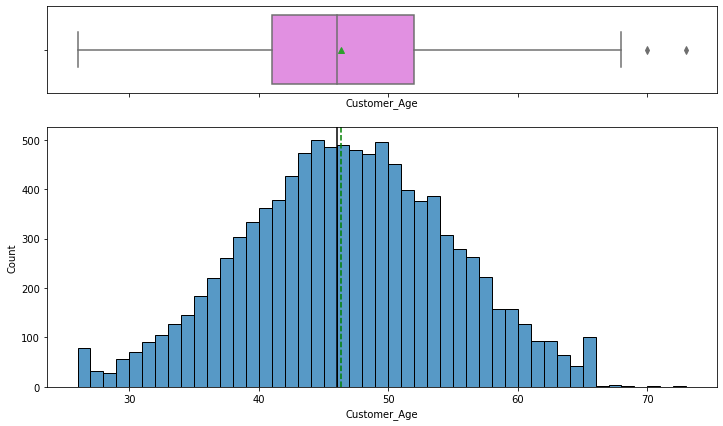

In [113]:
histogram_boxplot(data, "Customer_Age")

Age seems to be Normally distibuted. Mean age is 46 years

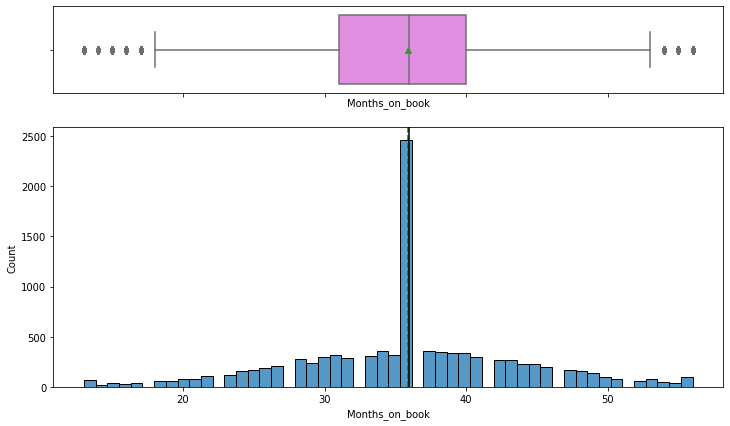

In [114]:
histogram_boxplot(data, "Months_on_book")

Average months_on_book is about 35 months

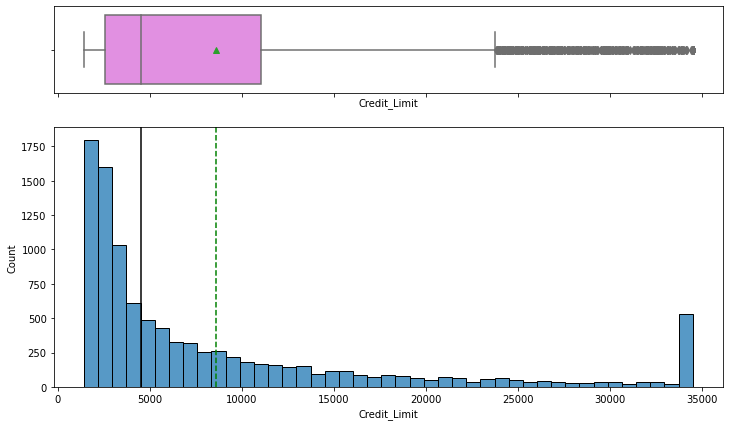

In [115]:
histogram_boxplot(data, "Credit_Limit")

Average credit_limt is about 8631 USD. Minimum credit limit is about 1438 and Max is about 35000.

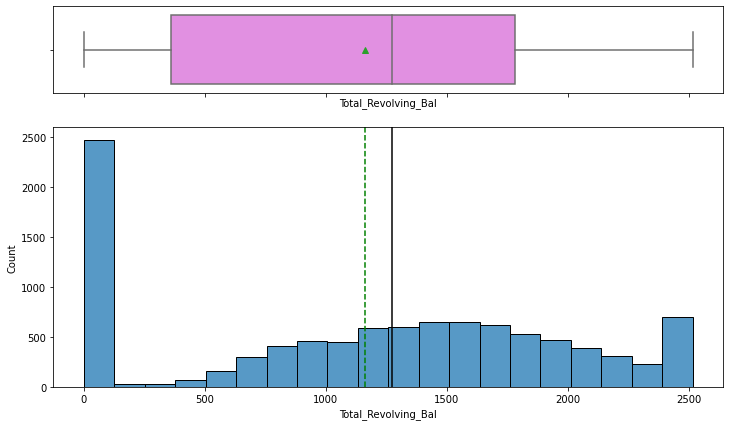

In [116]:
histogram_boxplot(data, "Total_Revolving_Bal")

Average total balance is about 1162.
There are about 2400 plus customers with 0 balnace and about 700 customers with balance of 2500.

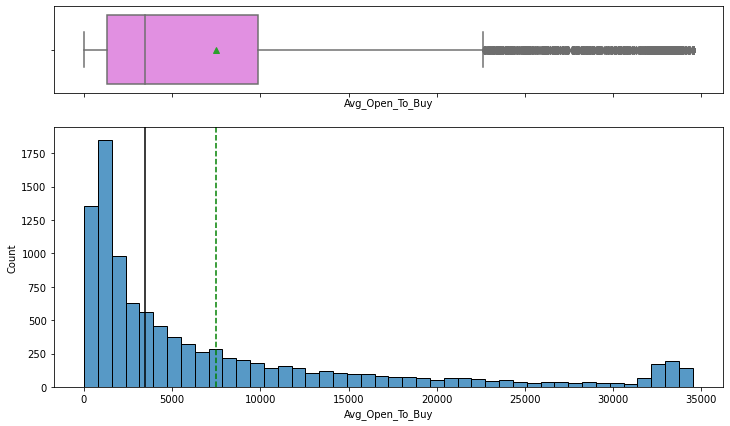

In [117]:
histogram_boxplot(data, "Avg_Open_To_Buy")

Average open to buy is about 7469 with Max value of 34516. 

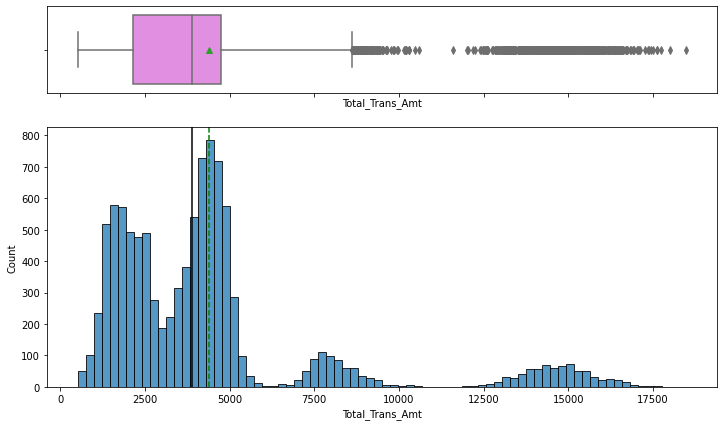

In [118]:
histogram_boxplot(data, "Total_Trans_Amt")

Average total_transaction amount is about 4404, and Min is about 510 and Max is 18484

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

The outcome variable is object which needs to be changed into an integer and with Binary class.
All the other objects will be converted to Hotencoding

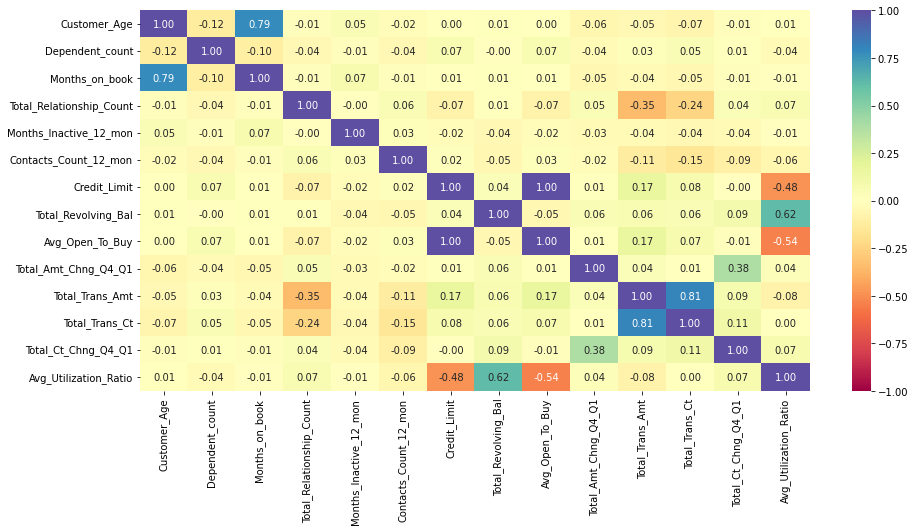

In [120]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

Months on Book and customer_age have a positive corrleation of 79%
As expected the Total Transaction Amount (Last 12 months) and Total Transaction Count (Last 12 months) of 81%

Bivariate Analysis

In [121]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

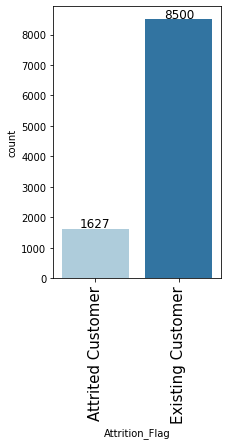

In [122]:
labeled_barplot(data, "Attrition_Flag", "Gender")

Females customers have slighltly more attired than male customers. 

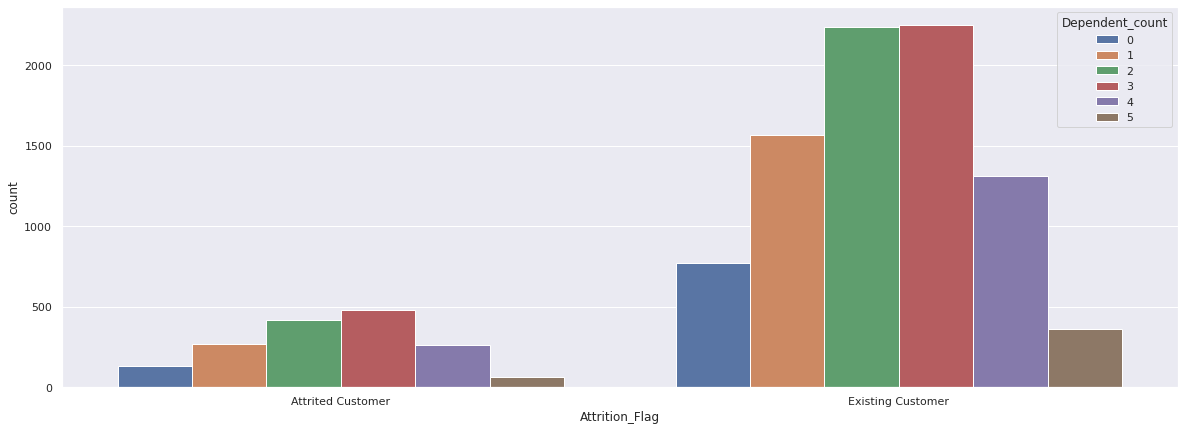

In [123]:
sns.set(color_codes=True);

plt.figure(figsize=(20,7));

sns.countplot(x='Attrition_Flag', data=data, hue='Dependent_count');

The number of attired customers are in general fall below 500 for all the categories of the number of dependents (from 0-5). The trend is same for the existing cutomers too albeit at higher levels.

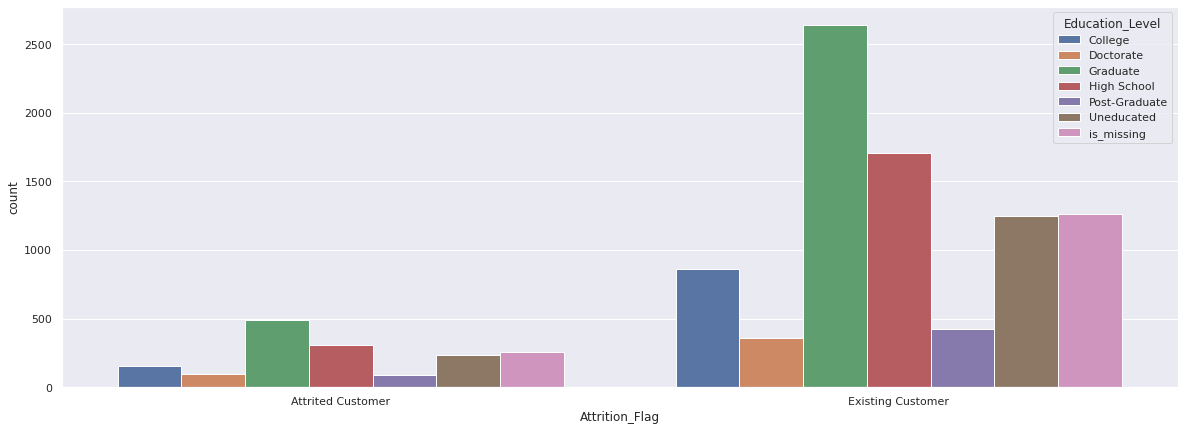

In [124]:
sns.set(color_codes=True);

plt.figure(figsize=(20,7));

sns.countplot(x='Attrition_Flag', data=data, hue='Education_Level');

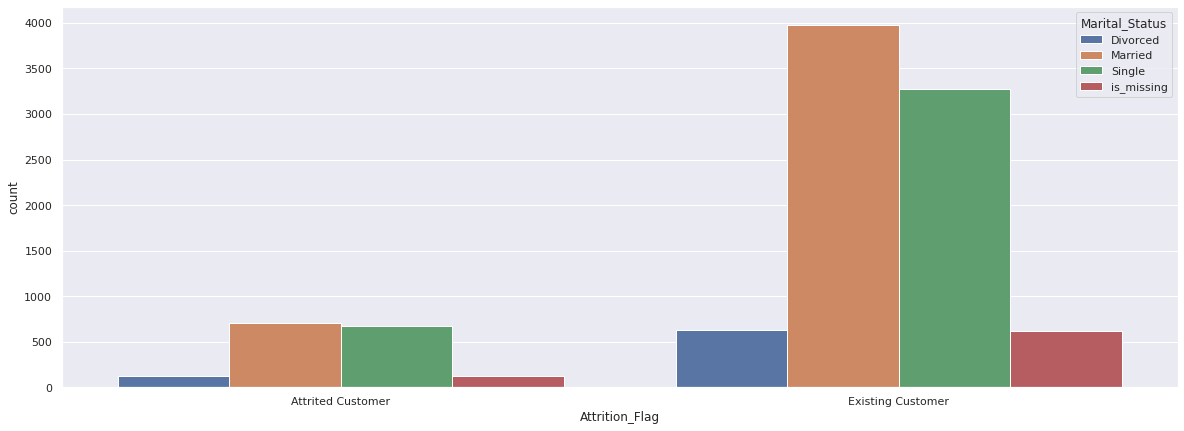

In [125]:
sns.set(color_codes=True);

plt.figure(figsize=(20,7));


sns.countplot(x='Attrition_Flag', data=data, hue='Marital_Status');

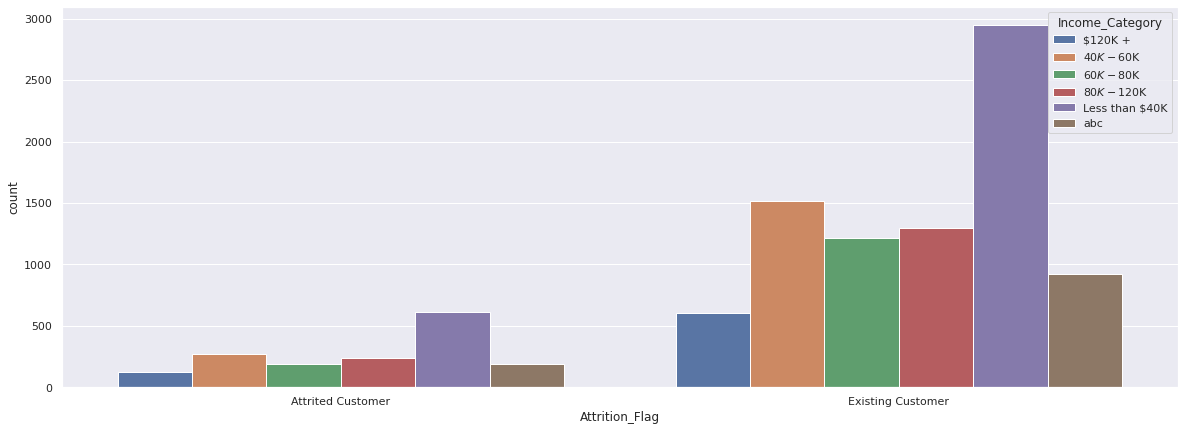

In [126]:
sns.set(color_codes=True);

plt.figure(figsize=(20,7));

sns.countplot(x='Attrition_Flag', data=data, hue='Income_Category');

Majority of the customers have income less than 40K. There are about 800 cutoerms whose income cateory is NOT known and is shown as 'abc' for the purpose of this model building I would NOT drop these values and keep them as is as I dont want to loose teh "Data"

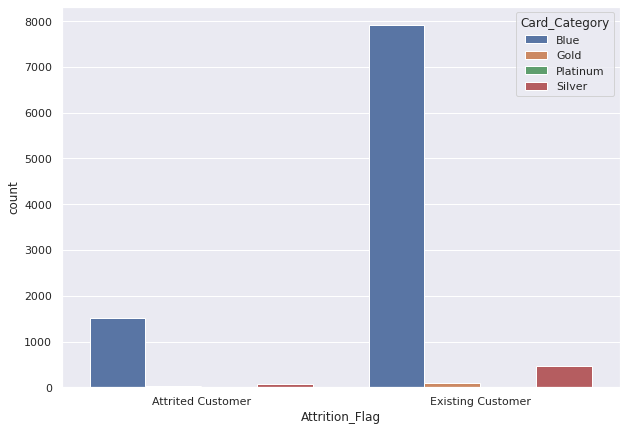

In [127]:
sns.set(color_codes=True);

plt.figure(figsize=(10,7));

sns.countplot(x='Attrition_Flag', data=data, hue='Card_Category');

Majority of thecustomers are Blue category in bothe attried and existing customers. 

In [128]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

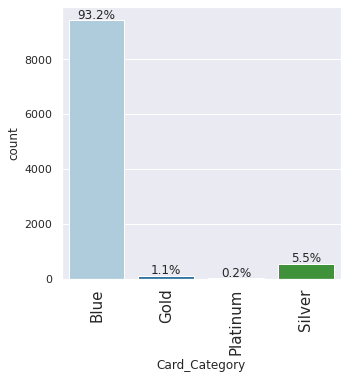

In [129]:
labeled_barplot(df, "Card_Category", perc=True)

# **Feature Engineering**

# HOT encoding for the categorical values and changing the outcome variable to Binary and integer. 

In [130]:
 ##data['Attrition_Flag'] = data['Attrition_Flag'].replace({1: 'Existing Customer', 0: 'Attrited Customer'})
 data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Existing Customer' :'0','Attrited Customer':'1'})



In [131]:
data['Attrition_Flag'] = data['Attrition_Flag'].astype(str).astype(int)

In [132]:
data.head() # checking if the outcome has become binary 

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,is_missing,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [133]:
# Also replacing the categorical var with actual values
data['Gender'] = data['Gender'].replace({1: 'F', 2: 'M'})
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,is_missing,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [134]:
#one hot encoding
data = pd.get_dummies(data, columns=['Gender'])
data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M
0,0,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,0,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0
2,0,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,0,40,4,High School,is_missing,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0
4,0,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [135]:
# Also replacing the categorical var with actual values
data['Education_Level'] = data['Education_Level'].replace({1: 'Graduate', 2: 'High School', 3:'is_missing', 4: 'Uneducated', 5: 'College', 6:'Post-Graduate', 7: 'Doctorate'})


In [136]:
#one hot encoding
data = pd.get_dummies(data, columns=['Education_Level'])
data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_is_missing
0,0,45,3,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0
1,0,49,5,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0
2,0,51,3,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0
3,0,40,4,is_missing,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,0,0,0
4,0,40,3,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,0,1,0


In [137]:
# Also replacing the categorical var with actual values
data['Marital_Status'] = data['Marital_Status'].replace({1: 'Married', 2: 'Single', 3:'is_missing', 4: 'Divorced'})


In [138]:
#one hot encoding
data = pd.get_dummies(data, columns=['Marital_Status'])
data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_is_missing,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_is_missing
0,0,45,3,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0,0,1,0,0
1,0,49,5,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,51,3,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0,0,1,0,0
3,0,40,4,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,0,0,0,0,0,0,1
4,0,40,3,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,0,1,0,0,1,0,0


In [139]:
# Also replacing the categorical var with actual values
data['Income_Category'] = data['Income_Category'].replace({1: 'Less than $40K', 2: '$40K - $60K', 3:'$60K - $80K', 4: '$80K - $120K', 5: '$120K +', 6: 'abc'})


Here we choose to keep the column 'abc' as we do not want to delete nor assign theh common value

In [140]:
#one hot encoding
data = pd.get_dummies(data, columns=['Income_Category'])
data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_is_missing,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_is_missing,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc
0,0,45,3,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,49,5,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,51,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,40,4,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,40,3,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [141]:
# Also replacing the categorical var with actual values
data['Card_Category'] = data['Card_Category'].replace({1: 'Blue', 2: 'Silver', 3:'Gold', 4: 'Platinum'})


In [142]:
#one hot encoding
data = pd.get_dummies(data, columns=['Card_Category'])
data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_is_missing,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_is_missing,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [143]:
# list(data) or
list(data.columns)

['Attrition_Flag',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Gender_F',
 'Gender_M',
 'Education_Level_College',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_is_missing',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_is_missing',
 'Income_Category_$120K +',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_abc',
 'Card_Category_Blue',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  int64  
 2   Dependent_count                 10127 non-null  int64  
 3   Months_on_book                  10127 non-null  int64  
 4   Total_Relationship_Count        10127 non-null  int64  
 5   Months_Inactive_12_mon          10127 non-null  int64  
 6   Contacts_Count_12_mon           10127 non-null  int64  
 7   Credit_Limit                    10127 non-null  float64
 8   Total_Revolving_Bal             10127 non-null  int64  
 9   Avg_Open_To_Buy                 10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 11  Total_Trans_Amt                 10127 non-null  int64  
 12  Total_Trans_Ct                  

# **Checking Class Balance**

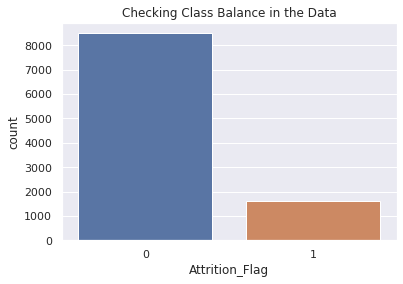

In [145]:
sns.set(color_codes=True);
plt.title("Checking Class Balance in the Data");
sns.countplot(data['Attrition_Flag']);

# Model **Building**

# Let's start by building different models using KFold and Cross_val_score and tune the best model using GridSearchCV and **RandomizedSearchCV** bold text **bold text**

Stratified K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [146]:
data1 = data.copy()

# Separating target variable and other variables

X = data1.drop(columns="Attrition_Flag")
X = pd.get_dummies(X)

Y = data1["Attrition_Flag"]

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

# X_train, X_val, y_train, y_val = train_test_split(
#     X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
# )
print(X_temp.shape, X_test.shape)

(8101, 37) (2026, 37)


# Class Balancing Function

We have observed previously that the Dependent Variable Response has high class imbalance. Hence we will try out four different class balancing strategy. We define a function below to allow us to modularize the codes.

In [147]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

def BALANCE_DATA(X_train, y_train, choice):
    
    if choice==1:
        sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
        
    elif choice==2:
        sm = RandomUnderSampler(random_state=1)
        
    elif choice==3:
        sm = NearMiss(version=1)
        
    elif choice==4: #----Hybrid called SMOTE tomek, K Means SMOTE
        sm = RandomOverSampler(random_state=1)
        
    elif choice==0:
        return X_train, y_train
    
    #Class balancing technique depending on the choice

    X_train_sample, y_train_sample = sm.fit_resample(X_train, y_train)
    
    return X_train_sample, y_train_sample

In [148]:
def hyperparameter_search(model):
    
    if model=="Bagging":
        
        # Grid of parameters to choose from
    #----------------------Parameter grid to pass in GridSearchCV
        param_grid={'n_estimators':np.arange(50,150,50),
                   'max_samples': [0.7, 0.8, 0.9]
                   }
    
    elif model=="XGBoost":
        
        # Grid of parameters to choose from
        #----------------------Parameter grid to pass in GridSearchCV
        param_grid={'n_estimators':np.arange(50,150,50),
        #             'Class__scale_pos_weight':[2,5,10],
                    'learning_rate':[0.01,0.1],
                    'gamma':[0,1]
                   }
        
    return param_grid

# **The Approach:**
Building the Model using Class Balancing + Cross Validation

In [149]:
def Model_Creation(CHOICE):
    
    """
    CHOICE = CHOICE of Class Balancing
    """
    
    models = []  # Empty list to store all the models

    #--------------------------Appending models into the list--------------------------

    models.append(("Bagging", BaggingClassifier(random_state=1)))
    
    models.append(("Random forest", RandomForestClassifier(random_state=1)))

    models.append(("GBM", GradientBoostingClassifier(random_state=1)))
    
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))

    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

    models.append(("dtree", DecisionTreeClassifier(random_state=1)))

    results = []  # Empty list to store all model's CV scores
    
    names = []  # Empty list to store name of the models


    #--------------------------loop through all models to get the mean cross validated score--------------------------
    print("\n" "Cross-Validation Performance:" "\n")

    for name, model in models:

        scoring = "recall" #Scoring parameter for K Fold CV
        
        # Stratified K Fold Cross Validation

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

        cv_result=[]


        #--------------------------loop through Training & Validation--------------------------
        #--------------------------SMOTE is applied on all Training Folds--------------------------
        #--------------------------Note: SMOTE is not applied on Validation Folds--------------------------

        for train_ix, validate_ix in kfold.split(X_temp, y_temp):
            
            #Separate the training and validation data out

            train_X, val_X = X_temp.iloc[train_ix], X_temp.iloc[validate_ix]
            train_y, val_y = y_temp.iloc[train_ix], y_temp.iloc[validate_ix]
            
            #train_x and train_y are data from k-1 folds

            X_train_un, y_train_un = BALANCE_DATA(train_X, train_y, CHOICE)

            
            #Grid Search CV (hyper parameter tuning module here)
            
            #param_grid=hyperparameter_search(name)
            
            # Run the grid search 
            #grid_obj = GridSearchCV(model, param_grid, scoring="recall", n_jobs=-1, cv=3)

            #grid_obj = grid_obj.fit(X_train_un, y_train_un) #Traing data

            # Type of scoring used to compare parameter combinations
            scorer = metrics.make_scorer(metrics.recall_score)



            model.fit(X_train_un, y_train_un)

            y_pred=model.predict(val_X) #Left out fold

            recall_val=recall_score(val_y,y_pred)

            cv_result.append(recall_val)



        results.append(cv_result)

        names.append(name)

        print("Model {}: using Class Balancing + Stratified Cross Validation produces average Recall {}".format(name,\
                                                                                                      round(np.mean(cv_result) * 100,2)))
       
        
    return results, names


# NO BALANCE

In [150]:
results_NB, names_NB=Model_Creation(0) # Default Model 


Cross-Validation Performance:

Model Bagging: using Class Balancing + Stratified Cross Validation produces average Recall 80.87
Model Random forest: using Class Balancing + Stratified Cross Validation produces average Recall 76.88
Model GBM: using Class Balancing + Stratified Cross Validation produces average Recall 84.25
Model Adaboost: using Class Balancing + Stratified Cross Validation produces average Recall 82.33
Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 82.33
Model dtree: using Class Balancing + Stratified Cross Validation produces average Recall 80.34


# SMOTE

In [151]:
results_SMOTE, names_SMOTE=Model_Creation(1) # Model with Synthetic Minority OverSampling Technique (SMOT) class balancing technique


Cross-Validation Performance:

Model Bagging: using Class Balancing + Stratified Cross Validation produces average Recall 85.87
Model Random forest: using Class Balancing + Stratified Cross Validation produces average Recall 82.95
Model GBM: using Class Balancing + Stratified Cross Validation produces average Recall 88.94
Model Adaboost: using Class Balancing + Stratified Cross Validation produces average Recall 84.64
Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 88.56
Model dtree: using Class Balancing + Stratified Cross Validation produces average Recall 79.8


# Random Under Sampling

In [152]:
results_RUS, names_RUS=Model_Creation(2) # Model with Random undersampling


Cross-Validation Performance:

Model Bagging: using Class Balancing + Stratified Cross Validation produces average Recall 91.32
Model Random forest: using Class Balancing + Stratified Cross Validation produces average Recall 93.47
Model GBM: using Class Balancing + Stratified Cross Validation produces average Recall 95.24
Model Adaboost: using Class Balancing + Stratified Cross Validation produces average Recall 93.4
Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 94.93
Model dtree: using Class Balancing + Stratified Cross Validation produces average Recall 89.71


# Near Miss

In [153]:
results_NM, names_NM=Model_Creation(3) # Model with NEarMiss


Cross-Validation Performance:

Model Bagging: using Class Balancing + Stratified Cross Validation produces average Recall 86.94
Model Random forest: using Class Balancing + Stratified Cross Validation produces average Recall 90.55
Model GBM: using Class Balancing + Stratified Cross Validation produces average Recall 92.17
Model Adaboost: using Class Balancing + Stratified Cross Validation produces average Recall 90.71
Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 92.63
Model dtree: using Class Balancing + Stratified Cross Validation produces average Recall 85.41


Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 95.39-- Highest recall. 

# Random Over Sampling

In [155]:
results_TML, names_TML=Model_Creation(4) # Model with Random oversampling


Cross-Validation Performance:

Model Bagging: using Class Balancing + Stratified Cross Validation produces average Recall 82.1
Model Random forest: using Class Balancing + Stratified Cross Validation produces average Recall 81.8
Model GBM: using Class Balancing + Stratified Cross Validation produces average Recall 93.47
Model Adaboost: using Class Balancing + Stratified Cross Validation produces average Recall 92.32
Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 94.16
Model dtree: using Class Balancing + Stratified Cross Validation produces average Recall 77.03


# Visualize Cross Validation Result

In [156]:
results_NM

[[0.8812260536398467,
  0.8846153846153846,
  0.8576923076923076,
  0.8692307692307693,
  0.8544061302681992],
 [0.946360153256705,
  0.9192307692307692,
  0.8846153846153846,
  0.8961538461538462,
  0.8812260536398467],
 [0.9195402298850575,
  0.95,
  0.8961538461538462,
  0.9192307692307692,
  0.9233716475095786],
 [0.9348659003831418,
  0.9192307692307692,
  0.9,
  0.8923076923076924,
  0.8888888888888888],
 [0.9386973180076629,
  0.9576923076923077,
  0.8961538461538462,
  0.9153846153846154,
  0.9233716475095786],
 [0.8659003831417624,
  0.8423076923076923,
  0.8846153846153846,
  0.8384615384615385,
  0.8390804597701149]]

In [ ]:
results_NM[0] #----Recall values of Bagging across 5 validation folds

In [159]:
results_NM[1]

[0.946360153256705,
 0.9192307692307692,
 0.8846153846153846,
 0.8961538461538462,
 0.8812260536398467]

In [158]:
XGB=results_NM[3] # Getting the highest recall model # 3, (Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 95.39)

print(XGB)

print(np.median(XGB)) # printing Median recall of the XGB 

[0.9348659003831418, 0.9192307692307692, 0.9, 0.8923076923076924, 0.8888888888888888]
0.9


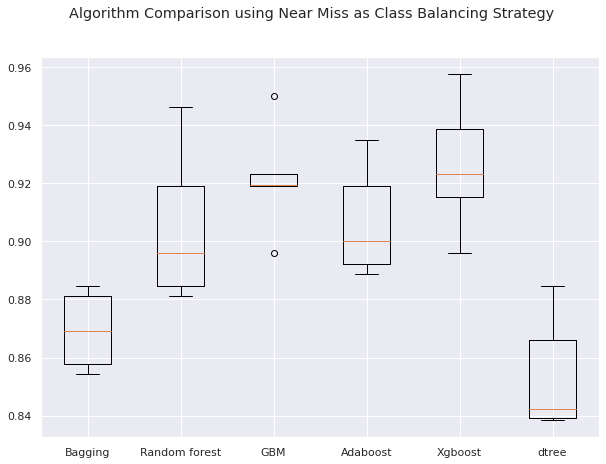

In [157]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison using Near Miss as Class Balancing Strategy")
ax = fig.add_subplot(111)

plt.boxplot(results_NM)
ax.set_xticklabels(names_NM)

plt.show()

Findings:
Four differemt class balancing strategies were utilized of which Random Under Sampling and Near miss produced the best output


NearMiss had higher cross validation recall (95.39, average recall across all cross validation folds). 

XGBOOST has the highest average recall and lowest variance of Recall Scores. We will try and Tune XGBOOST using Nearmiss Class Balancing Strategy

# Hyper Tuning XGBoost

In [160]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [161]:
  def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Grid Search CV

In [162]:
y_temp.value_counts()

0    6799
1    1302
Name: Attrition_Flag, dtype: int64

In [163]:
#----------------------defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')
# class_weight={0:0.18,1:0.82},

X_train_b, y_train_b = BALANCE_DATA(X_temp, y_temp, 3) #3 is Near miss

# Grid of parameters to choose from
#----------------------Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
#             'Class__scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1],
            'gamma':[0,1]
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(model, param_grid, scoring=scorer, n_jobs=-1, cv=3)

grid_obj = grid_obj.fit(X_train_b, y_train_b) #Traing data

# Set the clf to the best combination of parameters
xgb_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_estimator.fit(X_train_b, y_train_b)

XGBClassifier(eval_metric='logloss', gamma=1, random_state=1)

In [164]:
%%time

from imblearn.pipeline import Pipeline

#----------------------defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#----------------------define class balancing
sm = NearMiss(version=1)

#----------------------pipeline [('name the operation', operation object)]
pipeline = Pipeline([('sampling', sm), ('xgb', model)])

#----------------------Parameter grid to pass in GridSearchCV
param_grid={'xgb__n_estimators':np.arange(50,150,50),
#             'Class__scale_pos_weight':[2,5,10], #ratio of 0s to 1s
            'xgb__learning_rate':[0.01,0.1],
            'xgb__gamma':[0,1],
            'xgb__subsample':[0.8,0.9,1],
#             'max_depth':np.arange(1,5,1),
            'xgb__reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV

grid_cv.fit(X_temp, y_temp)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters are {'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 100, 'xgb__reg_lambda': 5, 'xgb__subsample': 0.8} with CV score=0.9270173887415266:
CPU times: user 2.35 s, sys: 562 ms, total: 2.91 s
Wall time: 1min 7s


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters are {'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 100, 'xgb__reg_lambda': 5, 'xgb__subsample': 0.8} with CV score=0.9270173887415266:
CPU times: user 2.88 s, sys: 621 ms, total: 3.5 s
Wall time: 1min 18s

Using the above results in fitting the Model below by plugging in the appropriate parameters. 

In [166]:
# building model with best parameters

X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)

xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    subsample=0.8,
    learning_rate=0.1,
    gamma=0,
    eval_metric="logloss",
    reg_lambda=5
)

# Fit the model on training data
xgb_tuned1.fit(X_train_over, y_train_over)

XGBClassifier(eval_metric='logloss', random_state=1, reg_lambda=5,
              subsample=0.8)

In [167]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_test, y_test)
print("Test performance:")
xgboost_grid_val

Test performance:


,Accuracy,Recall,Precision,F1
0,0.920533,0.953846,0.679825,0.793854


Recall is almost same in validation set after hyperparameters tuning. The hyperparameters used are {'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 100, 'xgb__reg_lambda': 5, 'xgb__subsample': 0.8}. THis higher recall onthe unseen data in validation dataset suggests that the fit is optimum-ie. not underfir or overfit. 

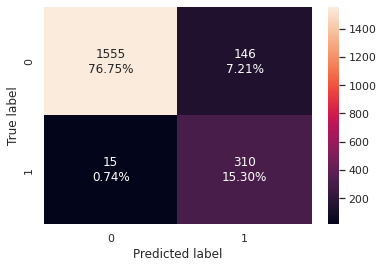

In [168]:
confusion_matrix_sklearn(xgb_tuned1, X_test, y_test)

In [170]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_temp, y_temp)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'learning_rate': 1, 'n_estimators': 100} 
Score: 0.880913645741232
CPU times: user 8.92 s, sys: 1.74 s, total: 10.7 s
Wall time: 9min 6s


In [178]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_temp, y_temp)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=100, random_state=1)

In [179]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_temp, y_temp
)
print("Training performance:")
print(Adaboost_grid_train)

print("*************************************")

Training performance:
   Accuracy    Recall  Precision        F1
0  0.995309  0.983103   0.987654  0.985373
*************************************


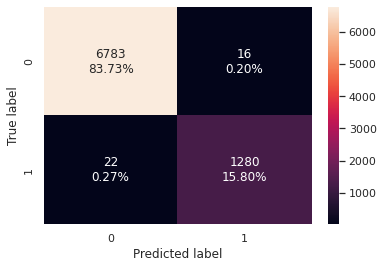

In [180]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_temp, y_temp)

The recall is 98%. So this Adaboost with Tuning gives the best model.  
XGB-tuned has about 146 people misclassified and Adaboost has only 16. 
A better performance than XGB. 
 

# Randomized Search CV

In [181]:
%%time

# defining model

model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV

param_grid={'class__n_estimators':np.arange(50,150,50),
#             'scale_pos_weight':[2,5,10],
            'class__learning_rate':[0.01,0.1],
            'class__gamma':[0,1],
            'class__subsample':[0.8,0.9,1],
#             'max_depth':np.arange(1,5,1),
            'class__reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

sm = NearMiss(version=1)

pipeline = Pipeline([('sampling', sm), ('class', model)])

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5, random_state=1, n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_temp, y_temp)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'class__subsample': 1, 'class__reg_lambda': 5, 'class__n_estimators': 100, 'class__learning_rate': 0.1, 'class__gamma': 1} with CV score=0.9170291777188329:
CPU times: user 968 ms, sys: 263 ms, total: 1.23 s
Wall time: 15.7 s


In [182]:
# building model with the above best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    subsample= 1, reg_lambda= 5, n_estimators= 100, learning_rate= 0.1, gamma= 1, eval_metric='logloss'
)


# building model with best parameters

X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)


# Fit the model on training data
xgb_tuned2.fit(X_train_over,y_train_over)

XGBClassifier(eval_metric='logloss', gamma=1, random_state=1, reg_lambda=5)

In [183]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned2, X_test, y_test)
print("Test performance:")
xgboost_grid_val

Test performance:


,Accuracy,Recall,Precision,F1
0,0.911155,0.953846,0.652632,0.775


Recall of Random search CV for XGB is (95%)  less than Adaboost with tuning (98%). with the paramaters subsample= 1, reg_lambda= 5, n_estimators= 100, learning_rate= 0.1, gamma= 1, eval_metric='logloss' is is sligtly better than Grid search.  It is improved from 97.2 in grid search to improved to 97.5.

In [184]:
#@title
models = []  # Empty list to store all the models

# #--------------------------Appending models into the list--------------------------

models.append(("Xgboost", xgb_tuned2))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# #--------------------------loop through all models to get the mean cross validated score--------------------------
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:

  scoring = "recall"

  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  cv_result=[]


#     #--------------------------loop through Training & Validation--------------------------
#     #--------------------------SMOTE is applied on all Training Folds--------------------------
#     #--------------------------Note: SMOTE is not applied on Validation Folds--------------------------

  for train_ix, test_ix in kfold.split(X_temp, y_temp):

         train_X, val_X = X_temp.iloc[train_ix], X_temp.iloc[test_ix]
         train_y, val_y = y_temp.iloc[train_ix], y_temp.iloc[test_ix]

         X_train_un, y_train_un = BALANCE_DATA(train_X, train_y, 3)


         model.fit(X_train_un, y_train_un)

         y_pred=model.predict(val_X)

         recall_val=recall_score(val_y,y_pred)

         cv_result.append(recall_val)

  results.append(cv_result)

  names.append(name)

  print("Model {}: using Class Balancing + Stratified Cross Validation produces average Recall {}".format(name,\
                                                                                                   np.mean(cv_result) * 100))

results

#pd.DataFrame(results).T.describe()



Cross-Validation Performance:

Model Xgboost: using Class Balancing + Stratified Cross Validation produces average Recall 91.85853227232536


[[0.9272030651340997,
  0.9423076923076923,
  0.8923076923076924,
  0.9192307692307692,
  0.9118773946360154]]

In [185]:
print("with 90%CI")

pd.DataFrame(results).quantile([0.05, 0.95])*100,2

with 90%CI


(              0          1          2          3          4
 0.05  92.720307  94.230769  89.230769  91.923077  91.187739
 0.95  92.720307  94.230769  89.230769  91.923077  91.187739, 2)

In [186]:
print("with 95%CI")
pd.DataFrame(results).quantile([0.025, 0.975])*100,2

with 95%CI


(               0          1          2          3          4
 0.025  92.720307  94.230769  89.230769  91.923077  91.187739
 0.975  92.720307  94.230769  89.230769  91.923077  91.187739, 2)

In [187]:
pd.DataFrame(results).T.describe() # Summary of all the models

,0
count,5.000000
mean,0.918585
std,0.018527
min,0.892308
25%,0.911877
50%,0.919231
75%,0.927203
max,0.942308


Mean of the sample is 0.91
Calculate 2*standard deviation : 2*(0.018)=  0.036
Lower range = Mean - 2xStandard deviation = 0.95- 0.036= 0.914
Upper Range = Mean + 2xStandard deviation (0.95+ 0.036 = 0.986)
Model tuned using class weights expected to see a recall score between 91% to 98% with 95% Confidence Interval

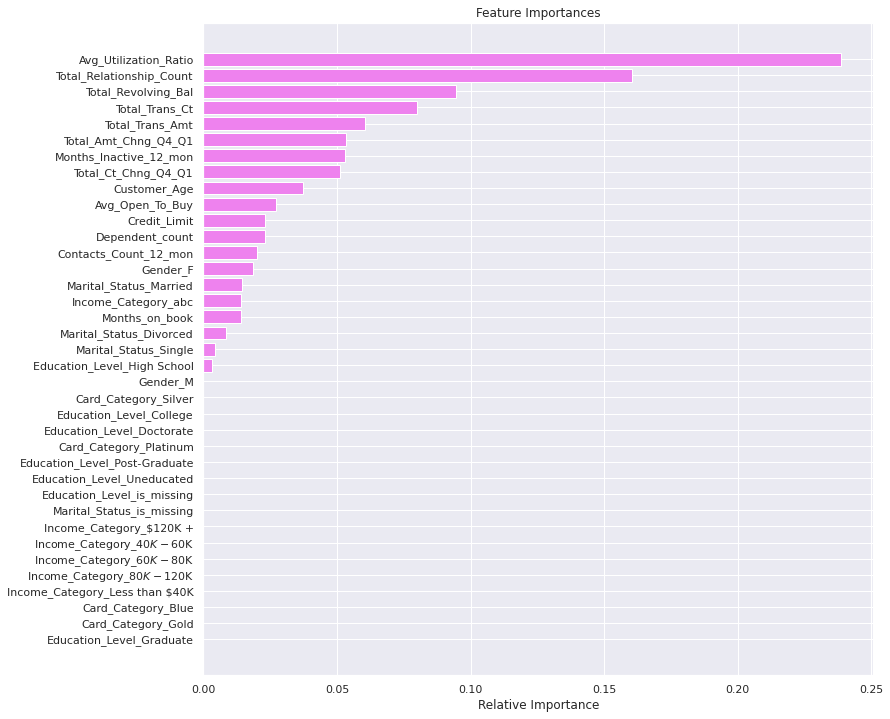

In [188]:
feature_names = X.columns ## Identifyin ghe important features
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations: Top Five 
So the Bank should target these customers who have higher 
1. Avg_Utilization_Ratio: Represents how much of the available credit the customer spent
2. Total_Relationship_Count: Total no. of products held by the customer
3. Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance.
4. Total_Trans_Ct: Total Transaction Count (Last 12 months):
5. Total_Trans_Amt: Total Transaction Amount (Last 12 months) 

In [194]:

!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 22.3 MB/s eta 0:00:00


In [195]:
## Initialize the package
shap.initjs()

In [196]:
explainer = shap.TreeExplainer(xgb_tuned2)
shap_values = explainer.shap_values(X)

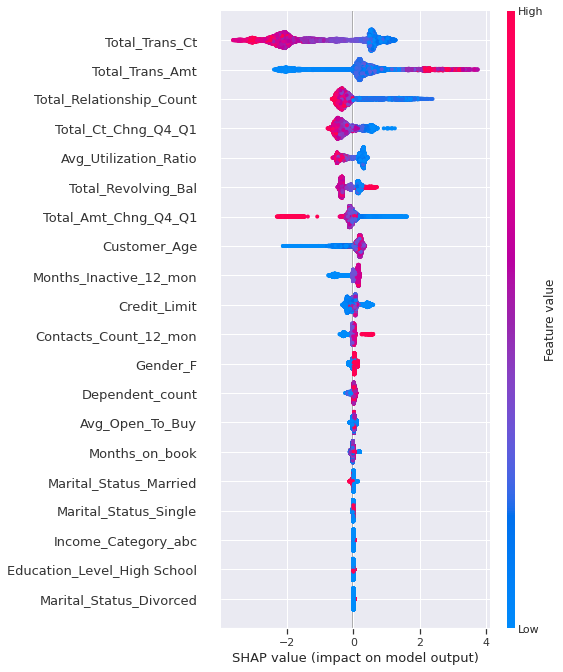

In [197]:
# Make plot.
shap.summary_plot(shap_values, X)

# **Business Recommendations:**

Company should target customers who have high Total transaction and total tranaction amout are the two most important features.

The The balance that carries over from one month to the next is the revolving balance is another important metric to retain the customers. 

Customers who have high Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter are important to target.  

 Total no. of products held by the customer are also very important to retain the customers. 

P.S: It is my bad that I did not remove Clientnum. But at this stage I do not want to goback . 

Randomized Search with Adaboost

# **Hypertuning Adaboost with Random CV**

In [198]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_temp, y_temp)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.880913645741232:
CPU times: user 4.67 s, sys: 592 ms, total: 5.26 s
Wall time: 3min 17s


In [199]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_temp, y_temp)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=100, random_state=1)

Training performance:
   Accuracy    Recall  Precision        F1
0  0.995309  0.983103   0.987654  0.985373
*************************************


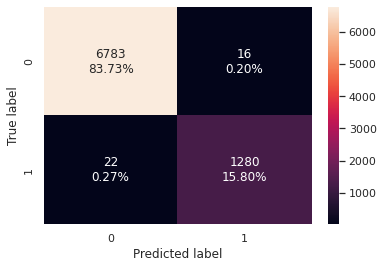

In [200]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_temp, y_temp
)
print("Training performance:")
print(Adaboost_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_temp, y_temp)

Same Recall : 98 % as in Grid search. 

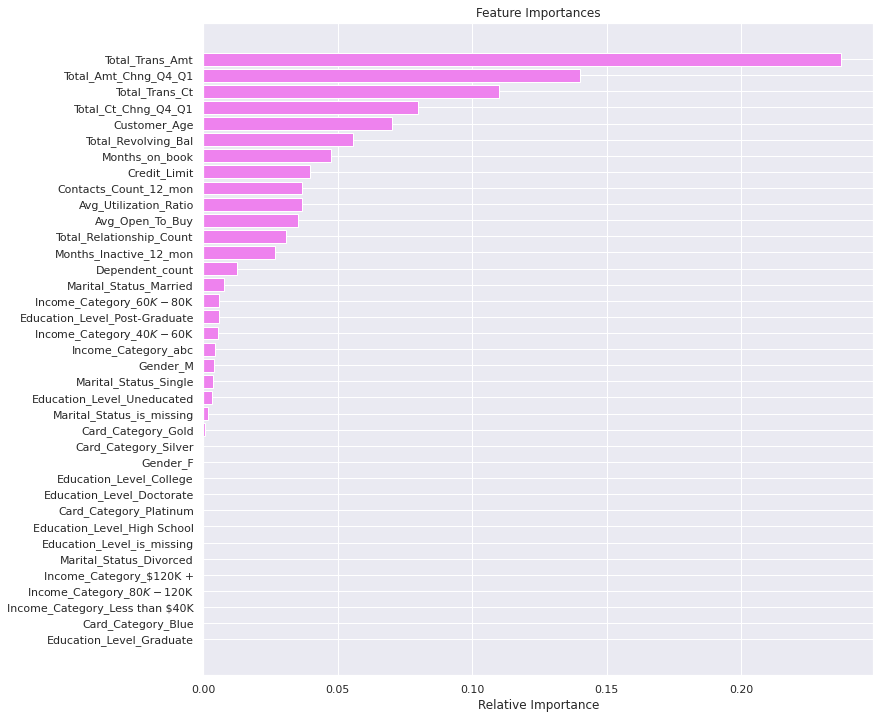

In [201]:
feature_names = X.columns ## Identifyin ghe important features
importances = adb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The recall of tuned Adaboost model 100% is  better the performaance of the K-cross validation and class balancing strategy recalls. 
The K-fold crossvalidations and class balanincg  recalls are as follows:

Model Adaboost with no cross validation: using Class Balancing + Stratified Cross Validation produces average Recall 82.03
Model Adaboostwith Synthetic Minority OverSampling Technique (SMOT)using Class Balancing + Stratified Cross Validation produces average Recall 85.18
Model Adaboost with Random undersampling using Class Balancing + Stratified Cross Validation produces average Recall 93.32
Model Adaboost with Near miss: using Class Balancing + Stratified Cross Validation produces average Recall 94.16
Model Adaboost with Random oversampling: using Class Balancing + Stratified Cross Validation produces average Recall 92.32 

So far XBG boost with tuned gave the highest recall. Hence business recommedations are based on XBG results.

# **Business Recommendations:**
IT IS IMPORTANT TO NOTE ADABOOST WITH HYPERTUNING GAVE BETTER RESULTS THAN XGB with TUNING. HEnce we need to use this model

Company should target customers who have 

1. high Total transaction and total tranaction amout are the two most important features. 
2.   Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
3.  Total Transaction Count (Last 12 months)
4.  Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
5.  Credit Limit on the Credit Card


# **Hypertuning Dtree**

In [202]:
# Creating pipeline
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_temp, y_temp)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2} 
Score: 0.80561155319776


In [203]:
# Creating new pipeline with best parameters
dtree_tuned1 = DecisionTreeClassifier(
    random_state=1, criterion="entropy", max_depth=None, min_samples_split=2
)

# Fit the model on training data
dtree_tuned1.fit(X_temp, y_temp)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [204]:
# Calculating different metrics on train set
dtree_grid_train = model_performance_classification_sklearn(
    dtree_tuned1, X_temp, y_temp
)
print("Training performance:")
dtree_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Great Recall

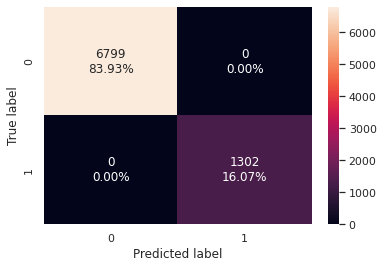

In [205]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned1, X_temp, y_temp)

0 Misclasified.
XGB_tuned had 146 misclassified.
Adaboost tuned had 16 
And dtree has none

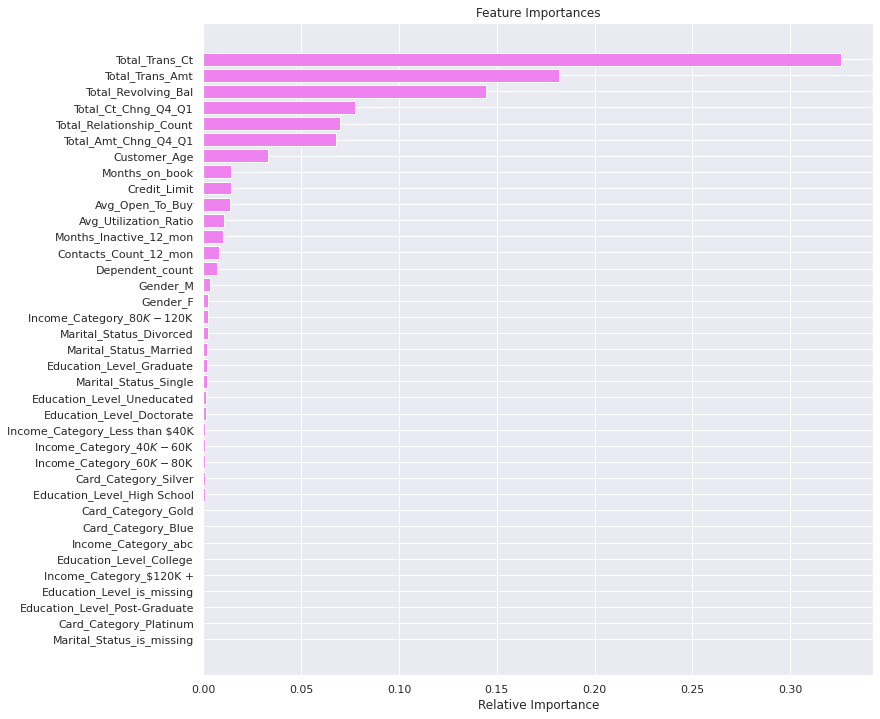

In [206]:
feature_names = X.columns ## Identifyin ghe important features
importances = dtree_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Tuned dtree also yeilds a recall of 1. 
The TOP MOST feature  i.e Total_Trans_Ct: Total Transaction Count (Last 12 months)followed by Total transaction amount. 
Total revolving balance is the third most important feature. 


# **Business Recommendations:**

Company should target customers who have high Total transaction and total tranaction amout are the two most important features. The The balance that carries over from one month to the next is the revolving balance is another important metric to retain the customers. Customers who have high Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter are important to target. Total no. of products held by the customer are also very important to retain the customers. 

In [207]:
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder

In [208]:
from sklearn.preprocessing import FunctionTransformer
import pandas as pd

In [209]:
df=pd.read_csv("/content/drive/MyDrive/Banck_churn_Project/BankChurners.csv")

In [210]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [211]:
from sklearn.base import BaseEstimator, TransformerMixin

#Custom Transformer that extracts columns passed as argument to its constructor

class IncomeTransformer():
    
    #Class Constructor 
    
    def __init__( self, feature_names):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    
    def fit( self, X, y = None ):
        return self
    
    #Method that describes what we need this transformer to do
    
    def transform(self, X, y = None ):
        
        def map_values(val):
            
            
            """
            if val not in ["revalant value1", "relavant vaue 2"]
            """
        
            if val in ["abc"]:

                return None
            else:
                return val
        
        X_=X.copy()
        
        X_[self._feature_names] = X_[self._feature_names].apply(map_values)
        
        return  X_

In [213]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [212]:
from imblearn.pipeline import Pipeline

# creating a list of numerical variables
numerical_features = [
    'Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
    ]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


model = Pipeline(
    steps=[
        ("CT", IncomeTransformer("Income_Category")),
        ("pre", preprocessor),
        ("class balance", SMOTE(random_state=1)),
        (
            "XGB",
            XGBClassifier(
    random_state=1,
    subsample= 0.9,
    scale_pos_weight=2,
    reg_lambda= 5, n_estimators= 100, max_depth= 4, learning_rate= 0.1, gamma= 0, eval_metric='logloss'
),
        )
    ]
)

In [214]:
# Separating target variable and other variables

## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

X = df.drop(columns="Attrition_Flag")
Y = df["Attrition_Flag"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(8101, 20) (2026, 20)


In [215]:
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('CT', <__main__.IncomeTransformer object at 0x7f875144c3a0>),
                ('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Ba...
                                                                   SimpleImputer(strategy

In [216]:
# Calculating different metrics on validation set
xgboost_pipeline = model_performance_classification_sklearn(model, X_test, y_test)
print("Test performance:")
xgboost_pipeline

Test performance:


,Accuracy,Recall,Precision,F1
0,0.9615,0.950769,0.832884,0.887931


In [239]:
from imblearn.pipeline import Pipeline

# creating a list of numerical variables
numerical_features = [
    'Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
    ]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


model = Pipeline(
    steps=[
        ("CT", IncomeTransformer("Income_Category")),
        ("pre", preprocessor),
        (
            "adb_tuned1",
            AdaBoostClassifier(
            n_estimators=100,
            learning_rate=1,
            random_state=1,
            base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
),
        )
    ]
)

In [240]:
# Separating target variable and other variables

## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

X = df.drop(columns="Attrition_Flag")
Y = df["Attrition_Flag"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(8101, 20) (2026, 20)


In [241]:
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('CT', <__main__.IncomeTransformer object at 0x7f8751237bb0>),
                ('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Ba...
                                                  Pipeline(steps=[('imputer',
           

In [242]:
# Calculating different metrics on validation set
AdaBoost_pipeline = model_performance_classification_sklearn(model, X_test, y_test)
print("Test performance:")
AdaBoost_pipeline

Test performance:


,Accuracy,Recall,Precision,F1
0,0.976308,0.92,0.931464,0.925697


With Pipeline and the Simple imputer being "Mostfrequent" the Recall is better with XGB with 95% recall. 

